<h1 style="text-align: center;">SpamShield - Spam Email Classifier</h1>

<h3 style="text-align: center;">Kaloyan Rakov</h3>

We all know how annoying spam emails can be, not only wasting our time but sometimes posing security risks. That’s why building a system to automatically classify emails as spam or not is both important and helpful. In this notebook, I will work on a spam email classifier system using machine learning algorithms.

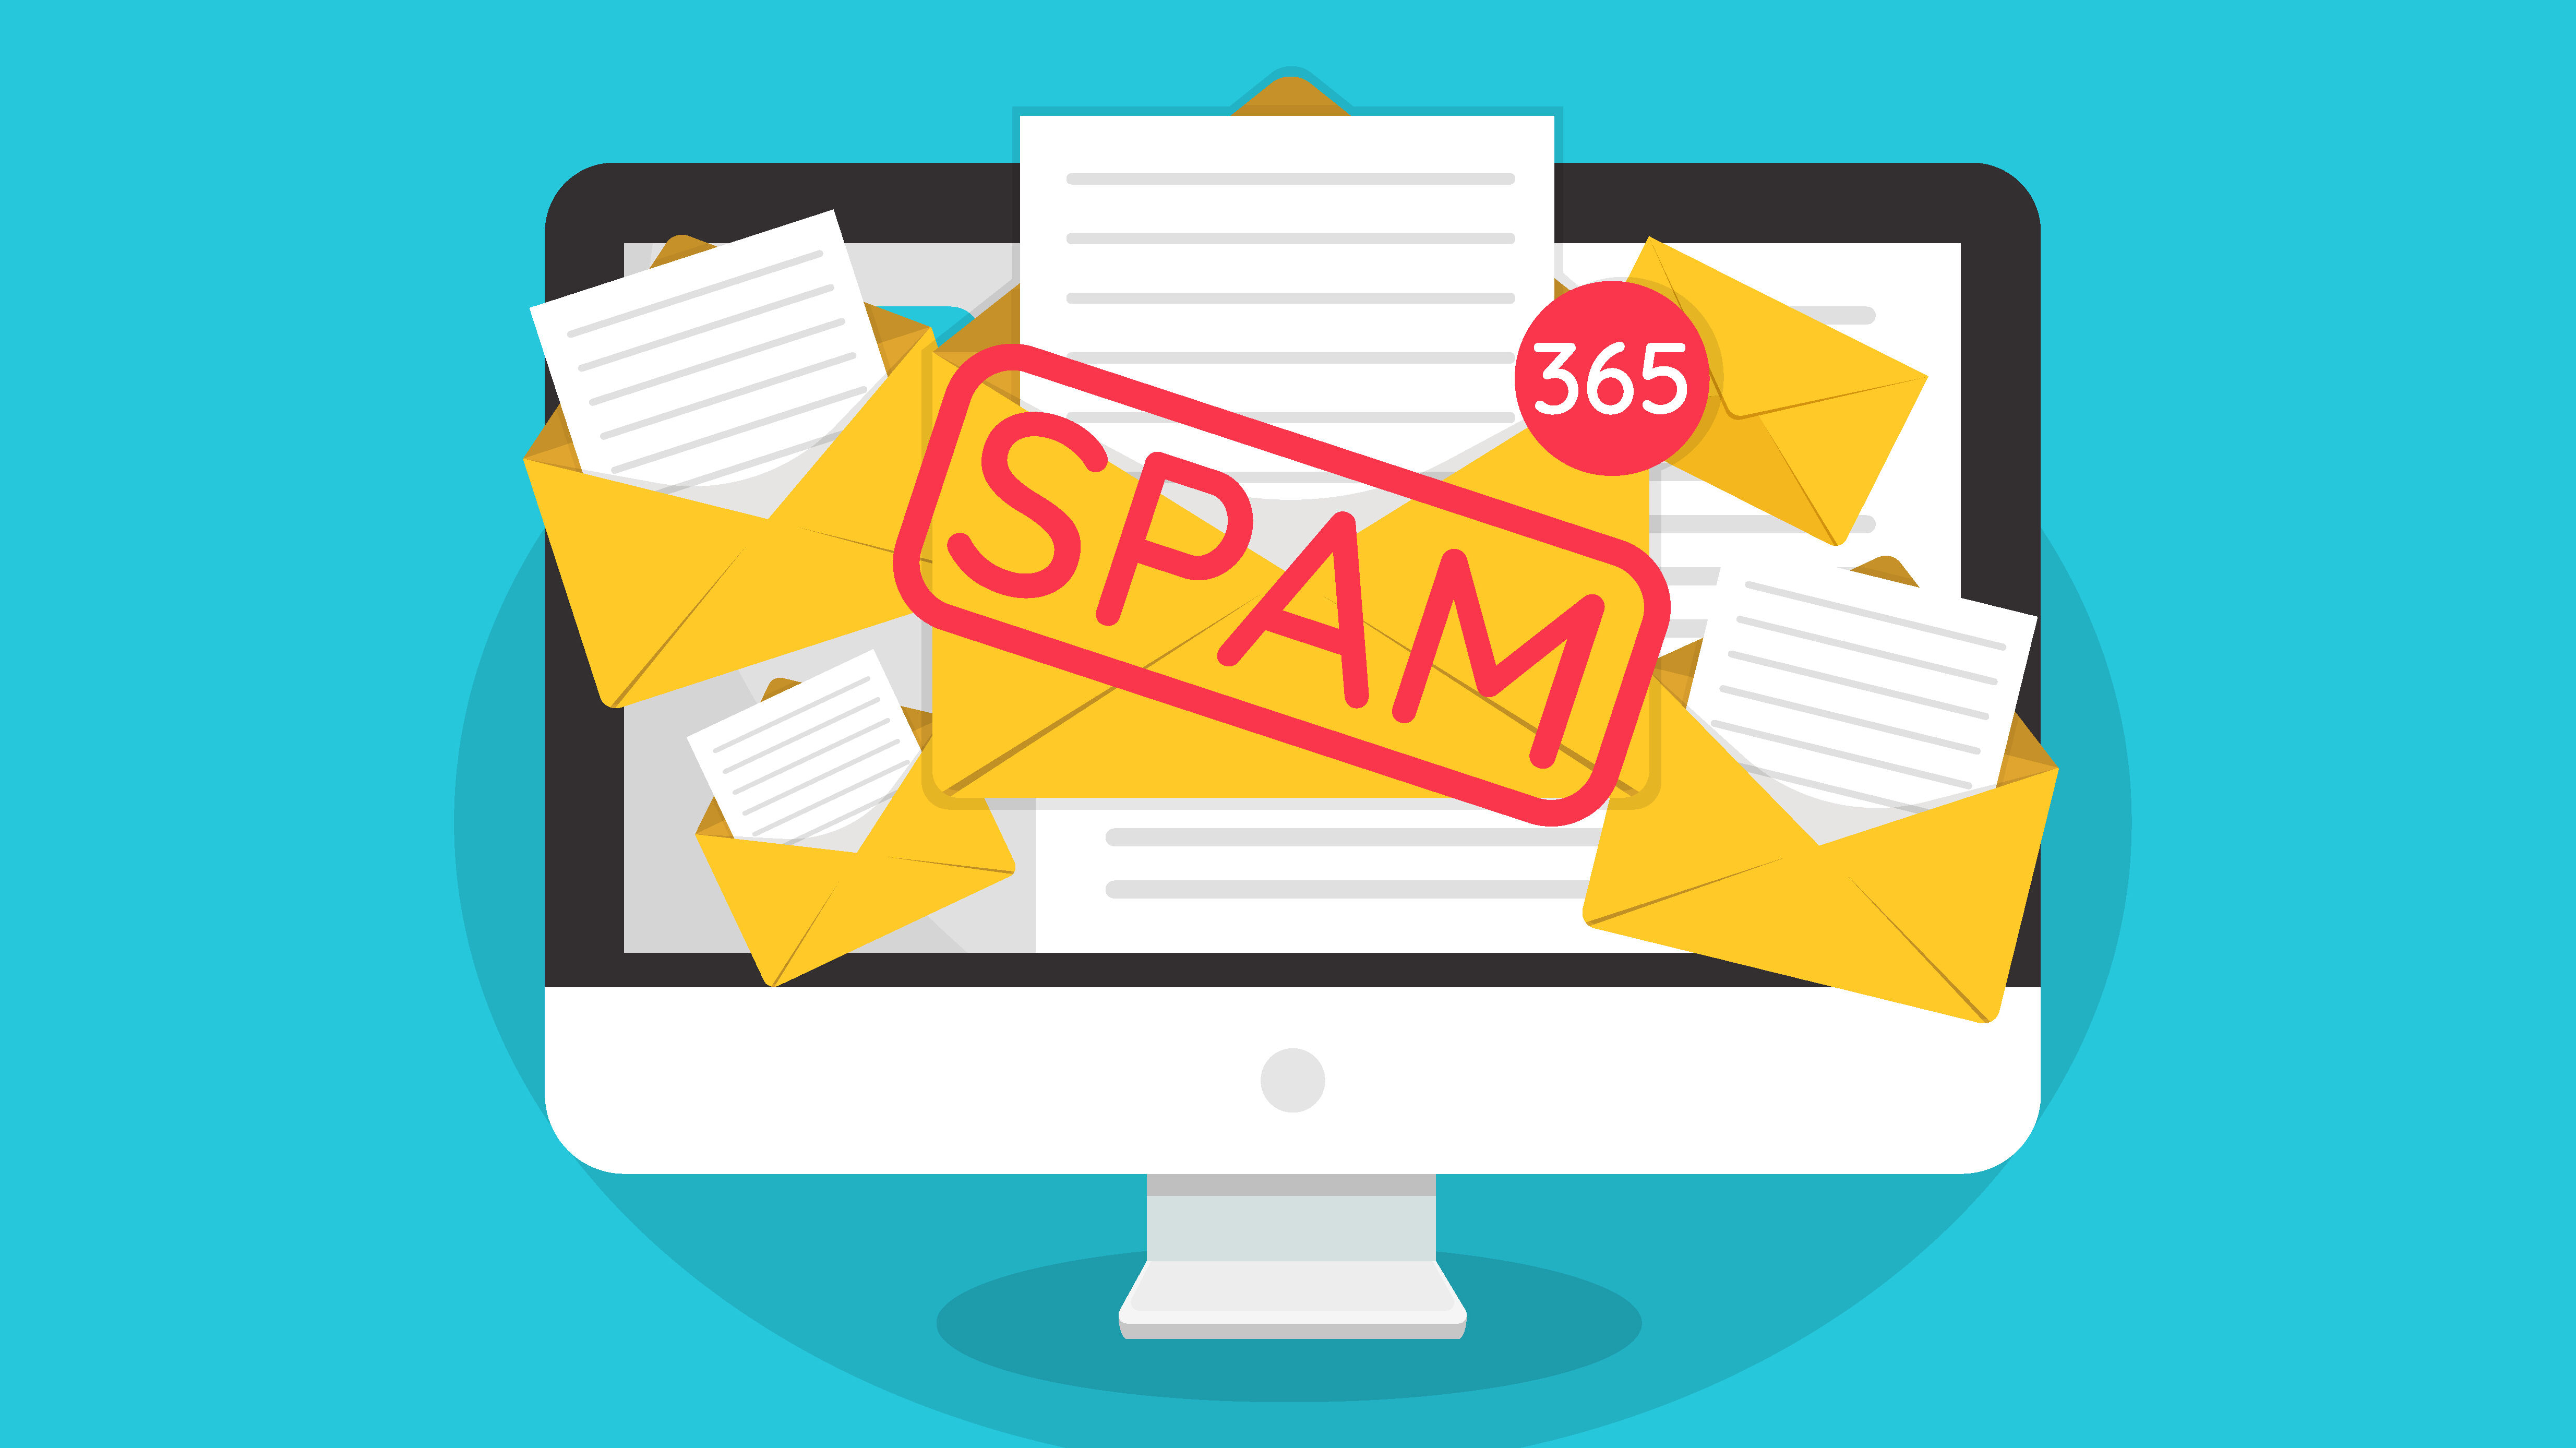

In [297]:
from IPython.display import Image
Image(filename='../Images/spam.jpg', width=1200)

# Data provisioning
What data are we working with:

I am going to be using a combination of two datasets:
1) The Ling-Spam Dataset: A collection of nearly 2900 emails from the Linguist List (https://linguistlist.org/). 
2) Enron Spam Dataset: A large set of real business emails (https://www2.aueb.gr/users/ion/data/enron-spam/).
3) TREC 2007 Public Corpus Dataset: A dataset courtesy of the University of Waterloo (https://plg.uwaterloo.ca/~gvcormac/treccorpus07/about.html).


The datasets were taken from Kaggle (original sources listed above):

https://www.kaggle.com/datasets/mandygu/lingspam-dataset

https://www.kaggle.com/datasets/venky73/spam-mails-dataset/data

https://www.kaggle.com/datasets/imdeepmind/preprocessed-trec-2007-public-corpus-dataset

# Data Sampling

In order for us to have a varied dataset, I will combine the 3 datasets mentioned above. 

Let's take a look at the first dataset:

In [298]:
import pandas as pd
df1 = pd.read_csv("../Datasets/Linguist List Dataset/LinguistListDataset.csv")
df1.head(15)

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0
6,m . a . in scandinavian linguistics,m . a . in scandinavian linguistics at the uni...,0
7,call for papers : linguistics session of the m...,call for papers linguistics session - - midwes...,0
8,foreign language in commercials,content - length : 1937 greetings ! i ' m wond...,0
9,fulbright announcement : please post / dissemi...,fulbright announcement : please post / dissemi...,0


Let's see how many of the records are spam and how many are not (0 = not spam, 1 = spam):

In [299]:
print(df1['label'].value_counts())

label
0    2412
1     481
Name: count, dtype: int64


Let's take a look at the second dataset:

In [300]:
df2 = pd.read_csv("../Datasets/Enron Dataset/EnronDataset.csv")
df2.head(15)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


Let's see how many of the records are spam and how many are not, again (0 = not spam, 1 = spam):

In [301]:
print(df2['label_num'].value_counts())

label_num
0    3672
1    1499
Name: count, dtype: int64


Let's take a look at the third dataset:

In [302]:
df3 = pd.read_csv("../Datasets/TREC Public Corpus Dataset/TRECPublicCorpusDataset.csv")
df3.head(15)

,label,subject,email_to,email_from,message
0,1,"Generic Cialis, branded quality@",the00@speedy.uwaterloo.ca,"""Tomas Jacobs"" <RickyAmes@aol.com>",Content-Type: text/html;\nContent-Transfer-Enc...
1,0,Typo in /debian/README,debian-mirrors@lists.debian.org,Yan Morin <yan.morin@savoirfairelinux.com>,"Hi, i've just updated from the gulus and I che..."
2,1,authentic viagra,<the00@plg.uwaterloo.ca>,"""Sheila Crenshaw"" <7stocknews@tractionmarketin...","Content-Type: text/plain;\n\tcharset=""iso-8859..."
3,1,Nice talking with ya,opt4@speedy.uwaterloo.ca,"""Stormy Dempsey"" <vqucsmdfgvsg@ruraltek.com>","Hey Billy, \n\nit was really fun going out the..."
4,1,or trembling; stomach cramps; trouble in sleep...,ktwarwic@speedy.uwaterloo.ca,"""Christi T. Jernigan"" <dcube@totalink.net>",Content-Type: multipart/alternative;\n ...
5,1,Which is duty,manager@speedy.uwaterloo.ca,"""Bobby L. Fleming"" <zvyrepeated@liselebel.com>",Content-Type: multipart/alternative;\n ...
6,1,For Theorize,<theorize@plg.uwaterloo.ca>,"""B.J. Badisang"" <mitigatemicroprocessor@g-rich...","Content-Type: text/plain;\n\tcharset=""Windows-..."
7,1,Theorize get inside for local esc0rts who do i...,"""Theorize"" <theorize@plg.uwaterloo.ca>","""Esteban Everett"" <dbmagyrln@dbmag.com>",Content-Type: Multipart/Alternative;\n bounda...
8,1,Losing Weight Quickly,theorize@plg.uwaterloo.ca,Real Loss <fibond@terra.com.do>,"Content-Type: text/plain;\n charset=""iso-88..."
9,0,[R] Confidence-Intervals.... help...,r-help@stat.math.ethz.ch,"""Jochen.F"" <jjfahr@ucalgary.ca>",Hi...\n\nI have to use R to find out the 90% c...


Let's see how many of the records are spam and how many are not, one last time (0 = not spam, 1 = spam):

In [303]:
print(df3['label'].value_counts())

label
1    50202
0    25217
Name: count, dtype: int64


Something important we need to take into consideration is the fact that we need a balanced dataset. If we train the model with a dataset that has overwhelmingly either more spam or not spam emails, then the classifications will be inadequate.

In [304]:
df1_counts = df1['label'].value_counts()
df2_counts = df2['label_num'].value_counts()
df3_counts = df3['label'].value_counts()

total_0 = df1_counts.get(0, 0) + df2_counts.get(0, 0) + df3_counts.get(0, 0)
total_1 = df1_counts.get(1, 0) + df2_counts.get(1, 0) + df3_counts.get(1, 0)

print(f"Non-spam mails (label = 0): {total_0}")
print(f"Spam mails (label = 1): {total_1}")

Non-spam mails (label = 0): 31301
Spam mails (label = 1): 52182


As we can see, throughout all 3 datasets we have overwhelmingly more spam mails. In order to make the dataset balanced, we will be working with the same amount of spam and not spam mails: 31 304 per each. 

# Processing

Let's do some processing so we can combine the 3 datasets.

Dataset 1:
Firstly, I wanna take all the rows where the "subject" value is Nan and change it to (no subject). Let's do the name for the messages. Secondly I wanna transform the 0 and 1 labels to words for easier understandability (1 = spam, 0 = not spam).

In [305]:
df1['subject'] = df1['subject'].fillna("(no subject)")
df1['message'] = df1['message'].fillna("(no message)")

df1['label'] = df1['label'].map({0: "not spam", 1: "spam"})
df1.head(10)

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,not spam
1,(no subject),"lang classification grimes , joseph e . and ba...",not spam
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,not spam
3,risk,a colleague and i are researching the differin...,not spam
4,request book information,earlier this morning i was on the phone with a...,not spam
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,not spam
6,m . a . in scandinavian linguistics,m . a . in scandinavian linguistics at the uni...,not spam
7,call for papers : linguistics session of the m...,call for papers linguistics session - - midwes...,not spam
8,foreign language in commercials,content - length : 1937 greetings ! i ' m wond...,not spam
9,fulbright announcement : please post / dissemi...,fulbright announcement : please post / dissemi...,not spam


Dataset 2: 

In the second dataset we can see that there is a "Subject:" line in every mail. I want to exctract it and put it in it's own column to match the structure of the 1st dataset. I dropped some unneeded columns like label_num (we are going to use words for the labels) and the unnamed column (no info was provided for this column and it's values anywhere). Also, we are going to label the mails as "spam" or "not spam", not "spam" or "ham". If there are no messages or subjects we are going to record them as "no message" or "no subjects".

In [306]:
def split_subject_message(text):
    if pd.isna(text):
        return pd.Series(["(no subject)", ""])
    lines = text.splitlines()
    if lines and lines[0].lower().startswith("subject:"):
        subject = lines[0][len("Subject:"):].strip()
        message = "\n".join(lines[1:]).strip()
        return pd.Series([subject, message])
    else:
        return pd.Series(["(no subject)", text.strip()])

df2[['subject', 'message']] = df2['text'].apply(split_subject_message)

df2.drop(columns=['text'], inplace=True)
df2 = df2[['subject', 'message', 'label']]
df2['label'] = df2['label'].map({'ham': 'not spam', 'spam': 'spam'})

df2['subject'] = df2['subject'].fillna("(no subject)")
df2['message'] = df2['message'].fillna("(no message)")

df2.head(10)

,subject,message,label
0,enron methanol ; meter # : 988291,this is a follow up to the note i gave you on ...,not spam
1,"hpl nom for january 9 , 2001",( see attached file : hplnol 09 . xls )\n- hpl...,not spam
2,neon retreat,"ho ho ho , we ' re around to that most wonderf...",not spam
3,"photoshop , windows , office . cheap . main tr...",abasements darer prudently fortuitous undergon...,spam
4,re : indian springs,this deal is to book the teco pvr revenue . it...,not spam
5,ehronline web address change,this message is intended for ehronline users o...,not spam
6,spring savings certificate - take 30 % off,save 30 % when you use our customer appreciati...,not spam
7,looking for medication ? we ` re the best sour...,it is difficult to make our material condition...,spam
8,noms / actual flow for 2 / 26,we agree\n- - - - - - - - - - - - - - - - - - ...,not spam
9,"nominations for oct . 21 - 23 , 2000",( see attached file : hplnl 021 . xls )\n- hpl...,not spam


Dataset 3: 

Here we need to make this dataset have the same structure as the ones before it, so we are keeping the subject, message and label columns. We are recording the labels as "spam" and "not spam", not as 1s and 0s. If there are no subject or messages we are going to note that, just like we did above.

In [307]:
import pandas as pd

df3 = pd.read_csv("../Datasets/TREC Public Corpus Dataset/TRECPublicCorpusDataset.csv")
df3 = df3[['subject', 'message', 'label']]
df3['label'] = df3['label'].map({0: 'not spam', 1: 'spam'})

df3['subject'] = df3['subject'].fillna("(no subject)")
df3['message'] = df3['message'].fillna("(no message)")

df3.head(10)

,subject,message,label
0,"Generic Cialis, branded quality@",Content-Type: text/html;\nContent-Transfer-Enc...,spam
1,Typo in /debian/README,"Hi, i've just updated from the gulus and I che...",not spam
2,authentic viagra,"Content-Type: text/plain;\n\tcharset=""iso-8859...",spam
3,Nice talking with ya,"Hey Billy, \n\nit was really fun going out the...",spam
4,or trembling; stomach cramps; trouble in sleep...,Content-Type: multipart/alternative;\n ...,spam
5,Which is duty,Content-Type: multipart/alternative;\n ...,spam
6,For Theorize,"Content-Type: text/plain;\n\tcharset=""Windows-...",spam
7,Theorize get inside for local esc0rts who do i...,Content-Type: Multipart/Alternative;\n bounda...,spam
8,Losing Weight Quickly,"Content-Type: text/plain;\n charset=""iso-88...",spam
9,[R] Confidence-Intervals.... help...,Hi...\n\nI have to use R to find out the 90% c...,not spam


Now our 3 datasets follow the same structure, allowing us to combine them.

Combining the datasets:

In [308]:
combined_df = pd.concat([df1, df2, df3], ignore_index=True)
combined_df.head(10)

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,not spam
1,(no subject),"lang classification grimes , joseph e . and ba...",not spam
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,not spam
3,risk,a colleague and i are researching the differin...,not spam
4,request book information,earlier this morning i was on the phone with a...,not spam
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,not spam
6,m . a . in scandinavian linguistics,m . a . in scandinavian linguistics at the uni...,not spam
7,call for papers : linguistics session of the m...,call for papers linguistics session - - midwes...,not spam
8,foreign language in commercials,content - length : 1937 greetings ! i ' m wond...,not spam
9,fulbright announcement : please post / dissemi...,fulbright announcement : please post / dissemi...,not spam


After having the dataset combined, let's look at the ratio between the spam and not spam mails (balance is important).

In [309]:
label_counts = combined_df['label'].value_counts()

not_spam_count = label_counts.get('not spam', 0)
spam_count = label_counts.get('spam', 0)

print(f"Not spam mails: {not_spam_count}")
print(f"Spam mails: {spam_count}")


Not spam mails: 31300
Spam mails: 52183


To balance out the data, we will be using only around 31 000 of each.

In [310]:
spam_df = combined_df[combined_df['label'] == 'spam']
not_spam_df = combined_df[combined_df['label'] == 'not spam']

spam_sampled = spam_df.sample(n=31303, random_state=42)
balanced_df = pd.concat([not_spam_df, spam_sampled], ignore_index=True)
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Balanced dataset created:")
print(balanced_df['label'].value_counts())

Balanced dataset created:
label
spam        31303
not spam    31300
Name: count, dtype: int64


Now we can see that the dataset we have is perfectly balanced.

Having that data, we can extract more details about the emails: data like the length of the subject and message, number of words in the message, number of links, exclamation and question marks. These characteristics may help us in the analysis further down the line.

In [311]:
import re

def extract_features(row):
    message = row['message']
    subject = row['subject']
    
    normalized_msg = re.sub(r'\b(http|https)\s*:\s*/\s*/', r'\1://', message)
    normalized_msg = normalized_msg.replace(' . ', '.').replace(' .', '.').replace('. ', '.')
    num_words = len(message.split())
    num_sentences = message.count('.') + message.count('!') + message.count('?')

    num_links = len(re.findall(
        r'\b(?:https?://|www\.)\S+|\b\S+\.(com|net|org|info|biz|edu|gov)(/\S*)?', normalized_msg, re.IGNORECASE))

    num_exclam = message.count('!')
    num_quest = message.count('?')
    
    return pd.Series({
        "subject_length": len(subject),
        "message_length": len(message),
        "num_words": num_words,
        "num_sentences": num_sentences,
        "num_links": num_links,
        "num_exclam": num_exclam,
        "num_quest": num_quest,
    })

features = balanced_df.apply(extract_features, axis=1)
balanced_df = pd.concat([balanced_df, features], axis=1)
balanced_df.to_csv("../Datasets/combined_email_dataset.csv", index=False)
balanced_df.head(10)

,subject,message,label,subject_length,message_length,num_words,num_sentences,num_links,num_exclam,num_quest
0,re : meter 986315 for 10 / 00,you put a deal in for torch for this time fram...,not spam,29,837,228,5,0,0,1
1,pilfer pancho acrid...,"Hello,\n\nLife Should be Full of Luxuries, yet...",spam,22,648,104,10,2,1,0
2,Re: [R] Sorting dataframe by different columns,maybe this page could give you some hints:\nht...,not spam,46,374,30,13,3,0,0
3,Re: [R] Problem installing gnomeGUI in Ubuntu:...,"Thanks a lot - Yes I have gnome 2.18, that mus...",not spam,78,1975,283,44,4,0,0
4,or trembling; stomach cramps; trouble in sleep...,Content-Type: multipart/alternative;\n ...,spam,65,17480,1078,65,0,0,0
5,Re: [R] factor analysis,"I haven't seen an answer to this post, so I th...",not spam,23,5821,959,93,5,0,8
6,Be in morrice,Does Size Matter7\n---\n\n60% of WOMEN said th...,spam,13,782,134,16,1,6,0
7,Sucks huh,Content-Type: multipart/alternative;\n\tbounda...,spam,9,7967,223,17,1,0,0
8,Beyond a certain length the expansion or contr...,Content-Type: text/html; charset=ISO-8859-1\nC...,spam,188,47687,1045,29,0,0,1
9,²Äà,Content-Type: text/plain;\nContent-Transfer-En...,spam,3,839,15,0,0,0,0


Let's check if we have any empty values for the messages or subjects in the combined dataset:

In [312]:
nan_summary = balanced_df[['subject', 'message']].isna().sum()
print(nan_summary)

subject    0
message    0
dtype: int64


We don't. Great, let's dive into the data itself.

---------------------------------------

# Data Visualisation

As I  underlined previously, a balanced dataset is cruical. Here we can see exactly that:

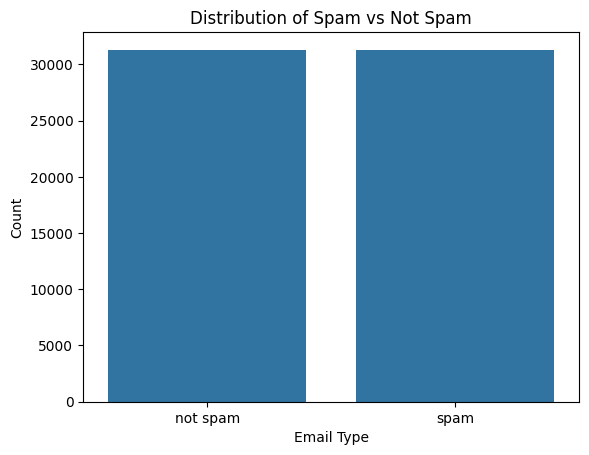

In [313]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=balanced_df, x='label')
plt.title("Distribution of Spam vs Not Spam")
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.show()

Let's now look into the characteristics of our dataset. First let's look at the subject and message lenght (in number of characters).

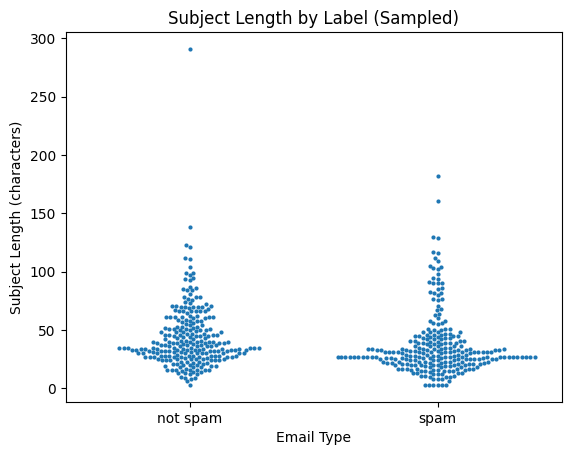

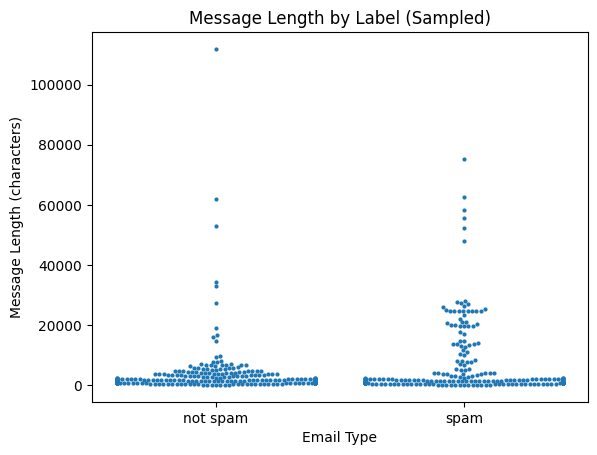

In [314]:
label_order = ['not spam', 'spam']

# Subject Length
sns.swarmplot(data=balanced_df.sample(500), x='label', y='subject_length', size=3, order=label_order)
plt.title("Subject Length by Label (Sampled)")
plt.xlabel("Email Type")
plt.ylabel("Subject Length (characters)")
plt.show()

# Message Length
sns.swarmplot(data=balanced_df.sample(500), x='label', y='message_length', size=3, order=label_order)
plt.title("Message Length by Label (Sampled)")
plt.xlabel("Email Type")
plt.ylabel("Message Length (characters)")
plt.show()

Even though there are some outlires, there is no clear distinction or trend that we could conclude from the graphs above, but it is still useful to look into it. The lenght of the messages and subjects cannot really be used to identify whether or not the email is spam or not. Now let's move on to the number of sentences and words.

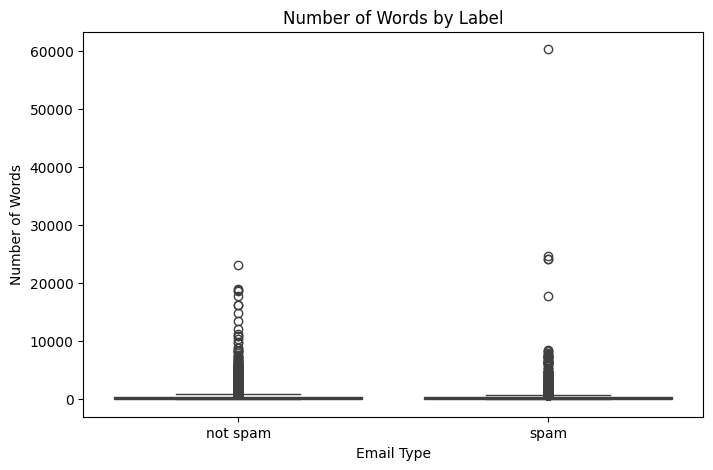

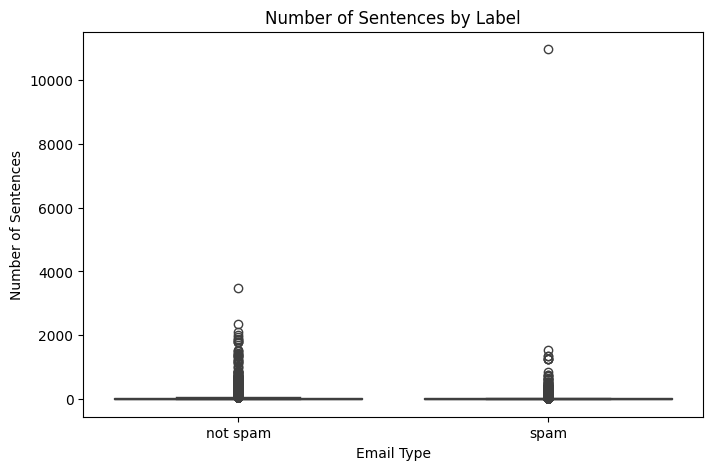

In [315]:
import seaborn as sns
import matplotlib.pyplot as plt

# Number of Words by Label
plt.figure(figsize=(8, 5))
sns.boxplot(data=balanced_df, x='label', y='num_words')
plt.title("Number of Words by Label")
plt.xlabel("Email Type")
plt.ylabel("Number of Words")
plt.show()

# Number of Sentences by Label
plt.figure(figsize=(8, 5))
sns.boxplot(data=balanced_df, x='label', y='num_sentences')
plt.title("Number of Sentences by Label")
plt.xlabel("Email Type")
plt.ylabel("Number of Sentences")
plt.show()


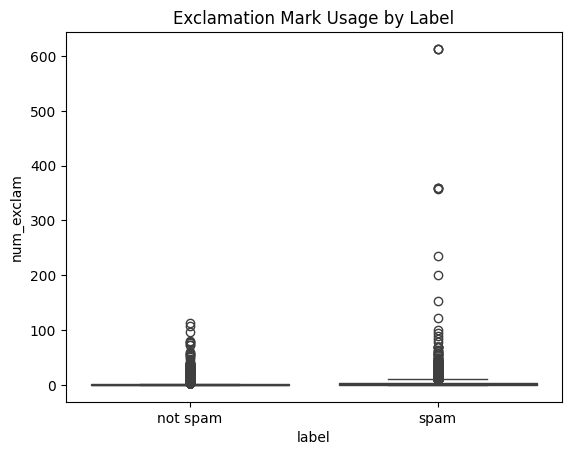

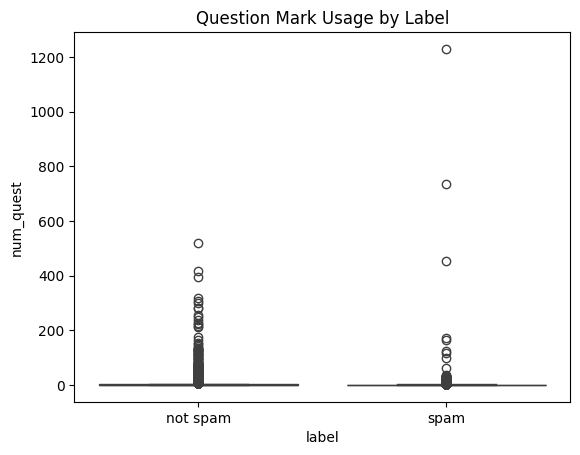

In [316]:
# Exclamation marks
sns.boxplot(data=balanced_df, x='label', y='num_exclam')
plt.title("Exclamation Mark Usage by Label")
plt.show()

# Question marks
sns.boxplot(data=balanced_df, x='label', y='num_quest')
plt.title("Question Mark Usage by Label")
plt.show()

As we can see, overusing the exclamation and question marks is a sign of the mails being spam. A lot of spam mails are advertisements, trying to get our attention, which explains the unnatural level of those signs in the messages. From the data we can see that the cases where the marks are used grow in a natural way, which is to be expected from non-spam mails.


Let's move to the usage of links in the mails:

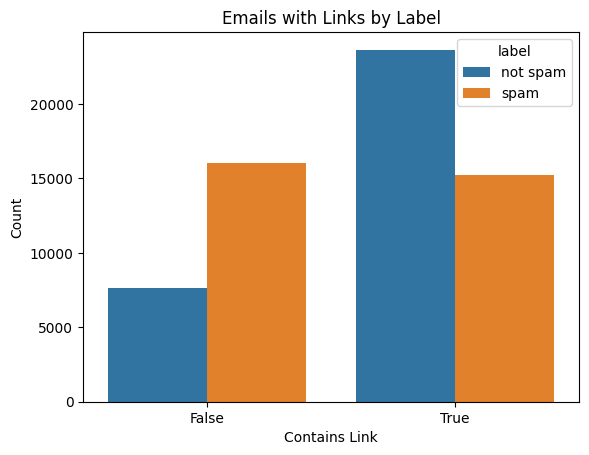

In [317]:
balanced_df['has_links'] = balanced_df['num_links'] > 0
sns.countplot(data=balanced_df, x='has_links', hue='label')
plt.title("Emails with Links by Label")
plt.xlabel("Contains Link")
plt.ylabel("Count")
plt.show()


Here we can see that the cases where non-spam mails have links is greater than the spam mails including them. The reason for that is that we are analysing a lot of business emails, which include links (a link we can see a lot in our dataset is : https://stat.ethz.ch/mailman/listinfo/r-help which is a working site. It's about the R Programing language and conversations around it).

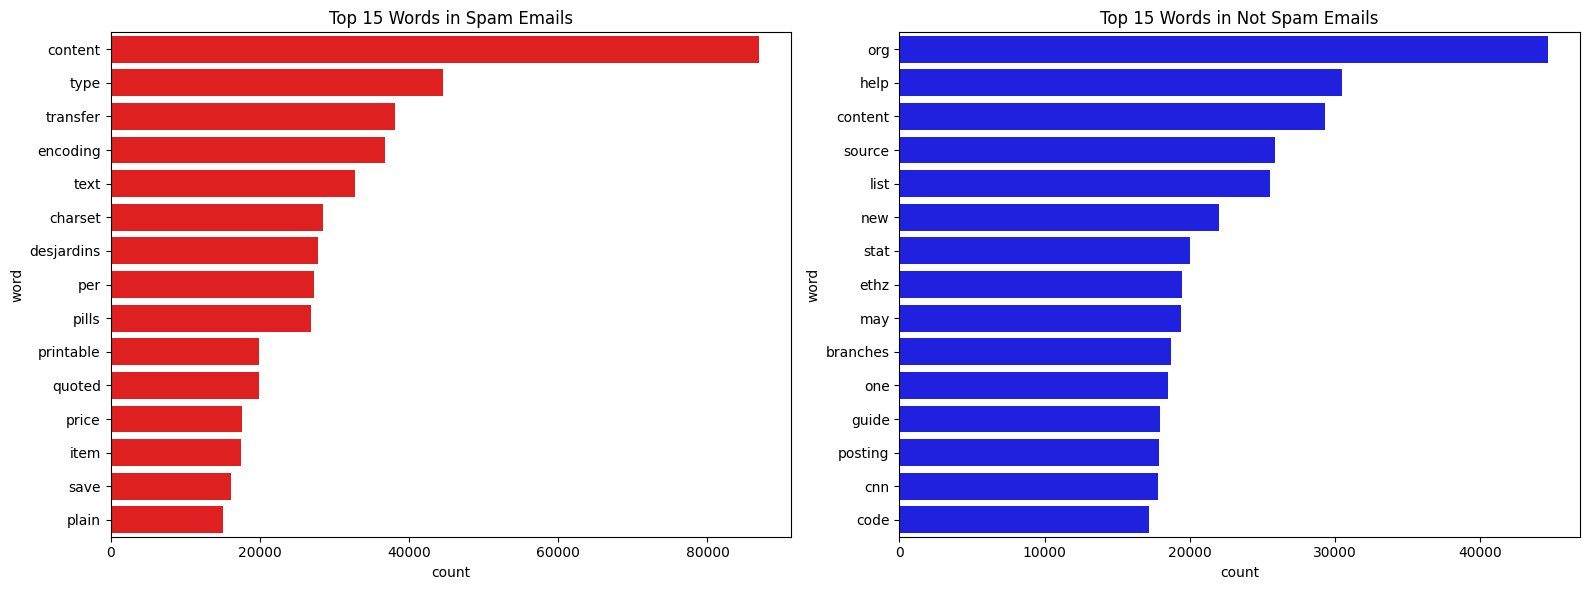

In [318]:
import warnings
warnings.filterwarnings("ignore")

from collections import Counter
import nltk
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

# Add custom stopwords
custom_stopwords = {'http', 'https', 'com', 'www', 'subject', 'click', 'email', 'please', 'mail', 'ect', 'make', 'html'}
stop_words.update(custom_stopwords)

def clean_and_tokenize(text):
    words = re.findall(r'\b[a-z]{3,}\b', text.lower())
    return [word for word in words if word not in stop_words]

spam_tokens = clean_and_tokenize(" ".join(balanced_df[balanced_df['label'] == 'spam']['message']))
not_spam_tokens = clean_and_tokenize(" ".join(balanced_df[balanced_df['label'] == 'not spam']['message']))

spam_freq = Counter(spam_tokens)
not_spam_freq = Counter(not_spam_tokens)

top_spam = pd.DataFrame(spam_freq.most_common(15), columns=['word', 'count'])
top_not_spam = pd.DataFrame(not_spam_freq.most_common(15), columns=['word', 'count'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data=top_spam, x='count', y='word', ax=axes[0], color="red")
axes[0].set_title("Top 15 Words in Spam Emails")

sns.barplot(data=top_not_spam, x='count', y='word', ax=axes[1], color="blue")
axes[1].set_title("Top 15 Words in Not Spam Emails")

plt.tight_layout()
plt.show()


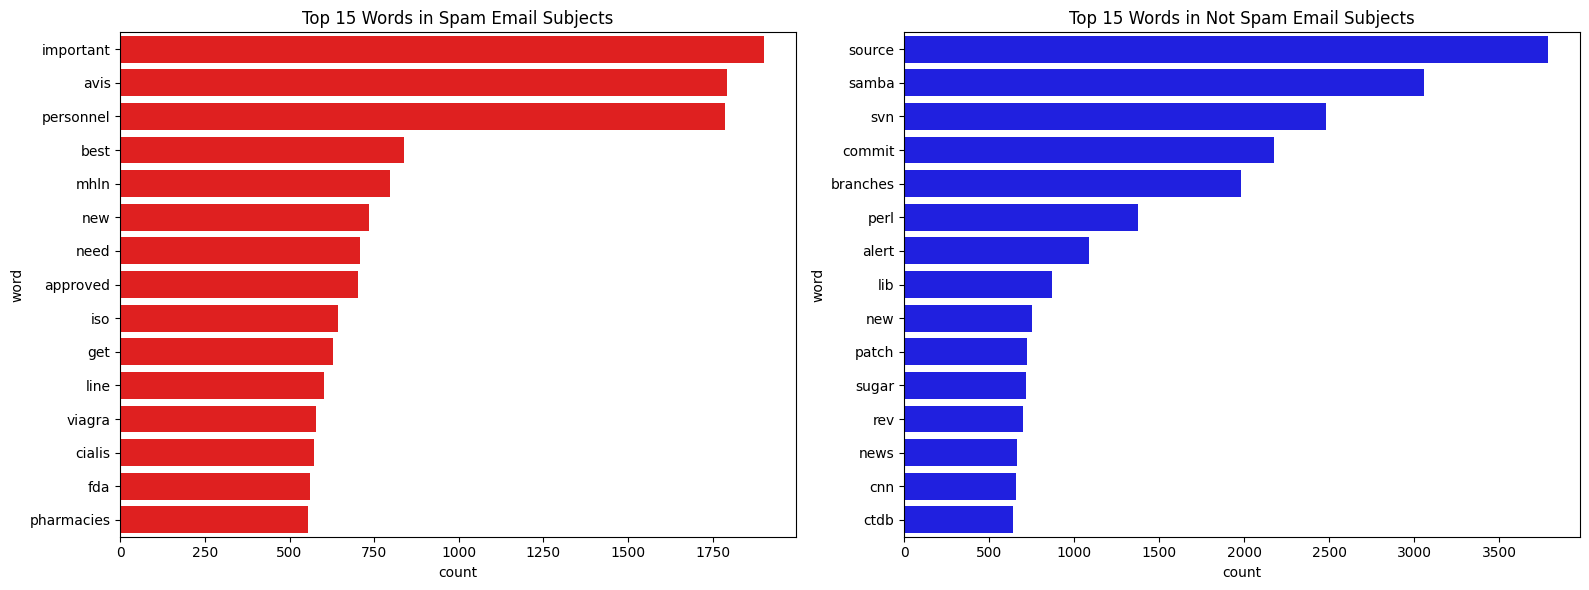

In [319]:
spam_subject_tokens = clean_and_tokenize(" ".join(balanced_df[balanced_df['label'] == 'spam']['subject']))
not_spam_subject_tokens = clean_and_tokenize(" ".join(balanced_df[balanced_df['label'] == 'not spam']['subject']))

spam_subject_freq = Counter(spam_subject_tokens)
not_spam_subject_freq = Counter(not_spam_subject_tokens)

top_spam_subjects = pd.DataFrame(spam_subject_freq.most_common(15), columns=['word', 'count'])
top_not_spam_subjects = pd.DataFrame(not_spam_subject_freq.most_common(15), columns=['word', 'count'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data=top_spam_subjects, x='count', y='word', ax=axes[0], color="red")
axes[0].set_title("Top 15 Words in Spam Email Subjects")

sns.barplot(data=top_not_spam_subjects, x='count', y='word', ax=axes[1], color="blue")
axes[1].set_title("Top 15 Words in Not Spam Email Subjects")

plt.tight_layout()
plt.show()


-----------------------------------------------

# Feature Selection and Defining the Target Variable

In [320]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define features to use for training
feature_cols = ['subject_length', 'message_length', 'num_words', 'num_sentences', 
                'num_links', 'num_exclam', 'num_quest']

X = balanced_df[feature_cols]
y = balanced_df['label']

# Convert labels to 0 and 1
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'not spam' → 0, 'spam' → 1


# Splitting the data into Train and Test

In [323]:
X_train, X_test, y_train, y_test = train_test_split(
X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
print("There are in total", len(y), "observations, of which", len(X_train), "are now in the train set and", len(X_test), "in the test set.")

There are in total 62603 observations, of which 50082 are now in the train set and 12521 in the test set.


# Modelling

1. Logistic Regression:

Logistic Regression
              precision    recall  f1-score   support

    not spam       0.72      0.77      0.74      6260
        spam       0.75      0.70      0.73      6261

    accuracy                           0.73     12521
   macro avg       0.74      0.73      0.73     12521
weighted avg       0.74      0.73      0.73     12521



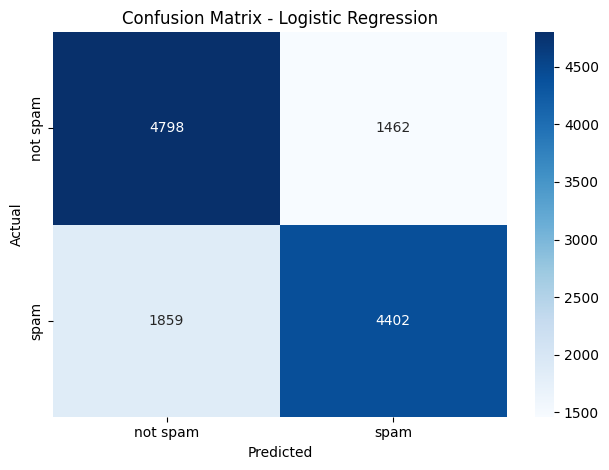

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression")
print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_pred_lr)
labels = ['not spam', 'spam']

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()


2. Random Forest

Random Forest
              precision    recall  f1-score   support

    not spam       0.92      0.95      0.93      6260
        spam       0.94      0.91      0.93      6261

    accuracy                           0.93     12521
   macro avg       0.93      0.93      0.93     12521
weighted avg       0.93      0.93      0.93     12521



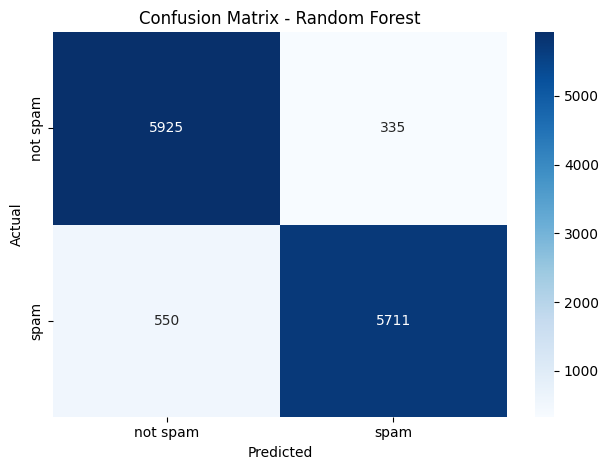

In [333]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_pred_rf)
labels = ['not spam', 'spam']

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()


3. Support Vector Machine (SVM)

🧊 Support Vector Machine
              precision    recall  f1-score   support

    not spam       0.61      0.63      0.62      6260
        spam       0.62      0.59      0.60      6261

    accuracy                           0.61     12521
   macro avg       0.61      0.61      0.61     12521
weighted avg       0.61      0.61      0.61     12521



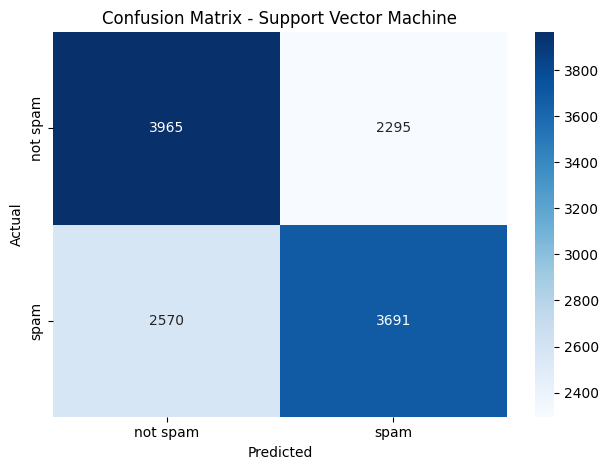

In [334]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("Support Vector Machine")
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_pred_svm)
labels = ['not spam', 'spam']

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Machine')
plt.tight_layout()
plt.show()


4. Naive Bayes

Naive Bayes
              precision    recall  f1-score   support

    not spam       0.66      0.83      0.73      6260
        spam       0.77      0.57      0.65      6261

    accuracy                           0.70     12521
   macro avg       0.71      0.70      0.69     12521
weighted avg       0.71      0.70      0.69     12521



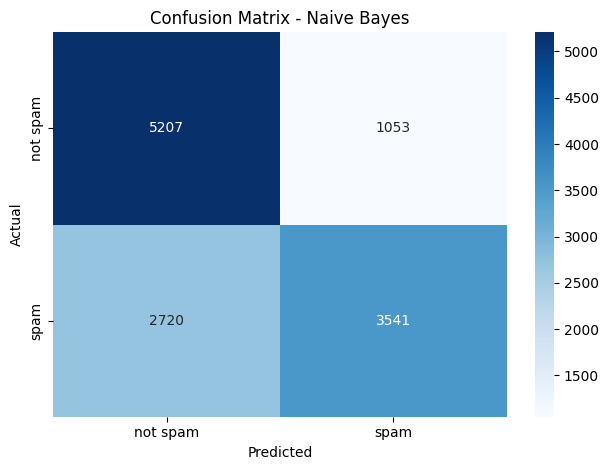

In [335]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes")
print(classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_pred_nb)
labels = ['not spam', 'spam']

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.tight_layout()
plt.show()


5.  K-Nearest Neighbors (KNN)

K-Nearest Neighbors
              precision    recall  f1-score   support

    not spam       0.84      0.86      0.85      6260
        spam       0.85      0.84      0.85      6261

    accuracy                           0.85     12521
   macro avg       0.85      0.85      0.85     12521
weighted avg       0.85      0.85      0.85     12521



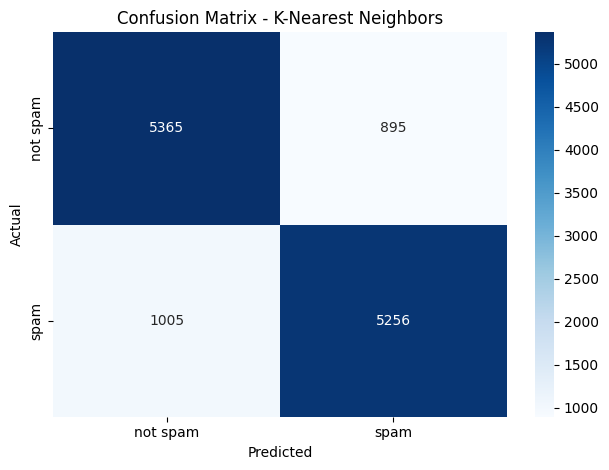

In [336]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("K-Nearest Neighbors")
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_pred_knn)
labels = ['not spam', 'spam']

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.tight_layout()
plt.show()
